In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('poster')

%matplotlib inline

Read in the [Stockoverflow Query](http://data.stackexchange.com/stackoverflow/query/211291/matlab-simulink-and-python-questions-per-month)

In [2]:
data = pd.read_csv('QueryResults.csv')

In [3]:
gd = data.pivot(index='month', columns='tag', values='count').fillna(0)

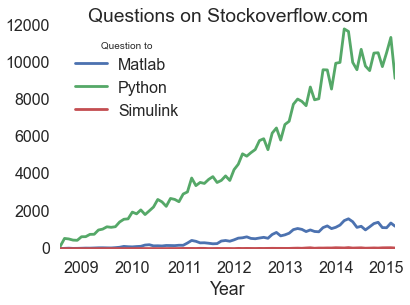

In [4]:
gd.index = pd.to_datetime(gd.index)
gd.columns.name = 'Question to'
gd.rename(columns={'python': 'Python', 'matlab': 'Matlab', 'simulink': 'Simulink'}, inplace=True)
gd.plot()

plt.title('Questions on Stockoverflow.com')
plt.xlabel('Year')
plt.savefig('stockoverflow-gesamt.png')
plt.savefig('stockoverflow-gesamt.eps')

In [5]:
gd['Matlab+Simulink'] = gd.Matlab+gd.Simulink

In [6]:
df = gd[['Python','Matlab+Simulink']]['01-01-2010':'01-01-2015']

#### Normalize it

In [7]:
def normalize(df):
    return 100.0*df.values/df.values[0]

In [8]:
df = df.apply(normalize)

#### Plot it

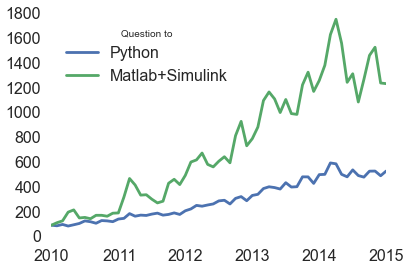

In [9]:
df.plot()
plt.ylabel='Prozent'
plt.title='Fragen auf stockoverflow.com nach Stichwort'
#plt.ylim(0, 1000)
plt.savefig('stockoverflow-2009-2014.png', dpi=72)
plt.savefig('stockoverflow-2009-2014.eps')